In [127]:
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
life = pd.read_csv("life.csv")
gdp = pd.read_csv("inflation.csv")
pop = pd.read_csv("pop.csv")

In [129]:
life_long = life.melt(id_vars='country', var_name='year', value_name='life')
gdp_long = gdp = gdp.melt(id_vars='country', var_name='year', value_name='gdp')
pop_long = pop = pop.melt(id_vars='country', var_name='year', value_name='pop')

In [130]:
print(life_long.head())
print(gdp_long.head())
print(pop_long.head())

       country  year  life
0  Afghanistan  1800  28.2
1       Angola  1800  27.0
2      Albania  1800  35.4
3      Andorra  1800   NaN
4          UAE  1800  30.7
     country  year   gdp
0  Argentina  1980  11.7
1  Australia  1980  18.3
2    Austria  1980  17.2
3    Belgium  1980  21.7
4   Bulgaria  1980   NaN
       country  year    pop
0  Afghanistan  1800  3.28M
1       Angola  1800  1.57M
2      Albania  1800   400k
3      Andorra  1800   2650
4          UAE  1800  40.2k


In [131]:
life_long['year'] = life_long['year'].astype(int)
gdp_long['year'] = gdp_long['year'].astype(int)
pop_long['year'] = pop_long['year'].astype(int)

In [132]:
gdp_long = gdp_long[gdp_long['gdp'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

pop_long = pop_long[pop_long['pop'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
pop_long['pop'] = pd.to_numeric(pop_long['pop'], errors='coerce')

<ipython-input-132-7b2d79cebbb2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_long['pop'] = pd.to_numeric(pop_long['pop'], errors='coerce')


In [133]:
life_long = life_long[(life_long['year'] >= 1980) & (life_long['year'] <= 2030)]
gdp_long = gdp_long[(gdp_long['year'] >= 1980) & (gdp_long['year'] <= 2030)]
pop_long = pop_long[(pop_long['year'] >= 1980) & (pop_long['year'] <= 2030)]

In [134]:
dados = pd.merge(life_long, gdp_long, on=['country', 'year'])
print(dados.head())
dados = pd.merge(dados, pop_long, on=['year'])
print(dados.head())

     country  year  life    gdp
0  Argentina  1980  70.2  11.70
1  Australia  1980  74.5  18.30
2    Austria  1980  72.8  17.20
3    Belgium  1980  73.3  21.70
4     Brazil  1980  62.7   7.63
   country_x  year  life   gdp country_y   pop
0  Argentina  1980  70.2  11.7  Holy See   727
1  Argentina  1980  70.2  11.7     Nauru  7640
2  Argentina  1980  70.2  11.7    Tuvalu  7730
3  Australia  1980  74.5  18.3  Holy See   727
4  Australia  1980  74.5  18.3     Nauru  7640


In [135]:
country_continent = {
    'China': 'Asia',
    'India': 'Asia',
    'United States': 'Americas',
    'Indonesia': 'Asia',
    'Brazil': 'Americas',
    'Russia': 'Europe',
    'Japan': 'Asia',
    'Mexico': 'Americas',
    'Germany': 'Europe',
    'France': 'Europe',
    'United Kingdom': 'Europe',
    'Italy': 'Europe',
    'South Africa': 'Africa',
    'Nigeria': 'Africa',
    'Egypt': 'Africa',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania'
}

In [136]:
dados['continent'] = dados['country_x'].map(country_continent)

In [137]:
dados = dados.dropna(subset=['continent'])
print(dados.head())

    country_x  year  life    gdp country_y   pop continent
3   Australia  1980  74.5  18.30  Holy See   727   Oceania
4   Australia  1980  74.5  18.30     Nauru  7640   Oceania
5   Australia  1980  74.5  18.30    Tuvalu  7730   Oceania
12     Brazil  1980  62.7   7.63  Holy See   727  Americas
13     Brazil  1980  62.7   7.63     Nauru  7640  Americas


In [138]:
x = dados['gdp']
y = dados['life']
tamanho = dados['pop'] / 100
cores = {'Asia': 'red', 'Africa': 'green', 'Europe': 'blue', 'Americas': 'yellow', 'Oceania': 'purple'}
cor_bolinhas = [cores[cont] for cont in dados['continent']]

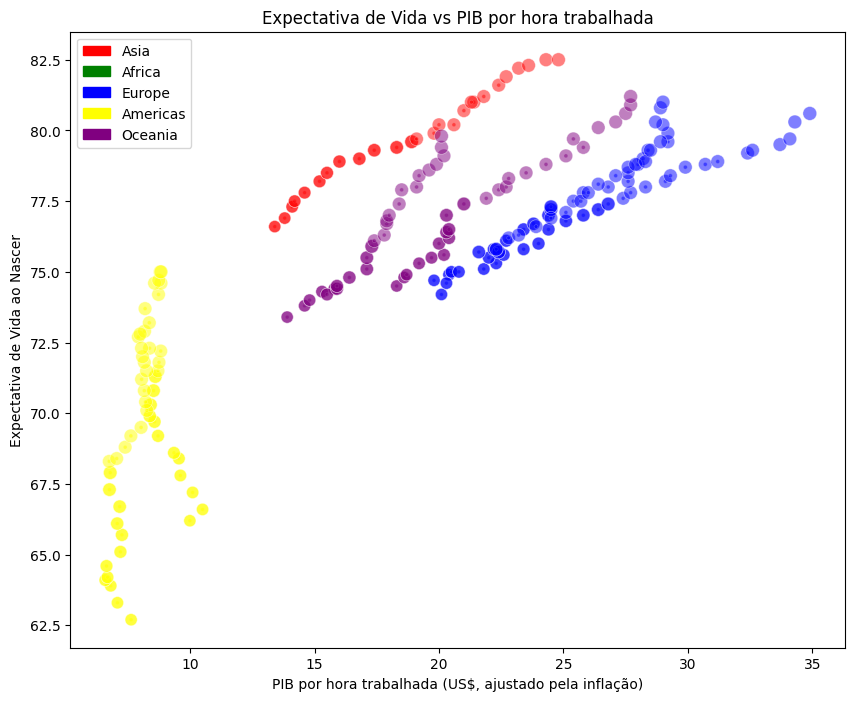

In [139]:
import matplotlib.patches as mpatches
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x, y, s=tamanho, c=cor_bolinhas, alpha=0.5, edgecolors='w', linewidth=0.5)
plt.xlabel('PIB por hora trabalhada (US$, ajustado pela inflação)')
plt.ylabel('Expectativa de Vida ao Nascer')
plt.title('Expectativa de Vida vs PIB por hora trabalhada')
legendas = [mpatches.Patch(color=cor, label=cont) for cont, cor in cores.items()]
plt.legend(handles=legendas)
plt.show()